In [ ]:
#NETWORKX / JSON / DATAFRAME / ADJMX / METRICS+SCATTER / VIZ+GEPHI

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


# NetworkX

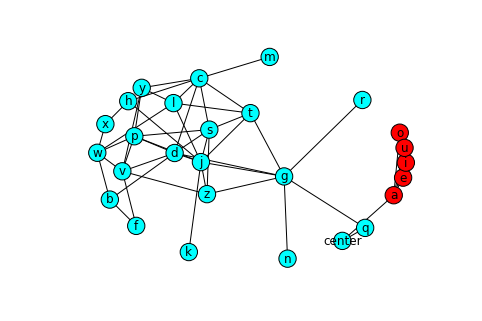

In [2]:
#create
demo = nx.Graph()  # creo un grapho vuoto; in una connessione non orientata, 
# l'arco AB è uguale a quello BA (sovrascrive la precedente connessione)

# demo = nx.DiGraph()  serve per fare delle connessioni orientate

consonants = list(set("bcdfghjklmnpqrstvwxyz"))
vowels = list(set("aeiou"))

#add nodes
for c in consonants:
    demo.add_node(c)   # demo = nome grapho; add_node = metodo
for v in vowels:
    demo.add_node(v)
    
#add random edges   #con il metodo add_edge aggiungo ARCHI
for i in range(50):  # aggiungo delle connessioni tra consonanti in modo random
    demo.add_edge(numpy.random.choice(consonants),numpy.random.choice(consonants))
    
    # provare con meno nodi: range (5), per es
    
for i in range(100):   # aggiungo delle connessioni tra vocali in modo random
    demo.add_edge(numpy.random.choice(vowels),numpy.random.choice(vowels))

# nodo center= degree molto basso, betweeness molto alta; tutti i cammini minimi passano da qui    
demo.add_edge('a', 'center')  
demo.add_edge('q', 'center')  
   
    
# draw
nx.draw(demo, with_labels=True, node_color=['red' if i in set('aeiou') else 'cyan' for i in demo.nodes_iter()])
# metodo nodes_iter = iteratore di nodi

In [3]:
print 'connected components',[cc for cc in nx.connected_components(demo)]
print

print 'degrees',np.array(nx.degree(demo))
print
# chiavi = label dei nodi; i valori sono i degree di ogni nodo
# degree = archi entranti, archi uscenti per nodo

print 'clustering_coefficients',np.array(nx.clustering(demo))
print

print 'diameter_vowels:',nx.diameter(demo.subgraph(vowels)),'- dimameter_consonant:',nx.diameter(demo.subgraph(consonants))

# subgraph:prendi solo il sottographo delle vocali, così isolo il sottographo rosso
# diametro: massimo numero di passi per andare da un punto all'altro all'interno del grapho

connected components [set(['d', 'a', 'c', 'b', 'e', 'center', 'g', 'f', 'i', 'h', 'k', 'j', 'm', 'l', 'o', 'n', 'q', 'p', 's', 'r', 'u', 't', 'w', 'v', 'y', 'x', 'z'])]

degrees {'d': 7, 'a': 7, 'c': 7, 'b': 3, 'e': 6, 'center': 2, 'g': 7, 'f': 2, 'i': 6, 'h': 3, 'k': 1, 'j': 9, 'm': 1, 'l': 5, 'o': 6, 'n': 1, 'q': 2, 'p': 6, 's': 6, 'r': 1, 'u': 6, 't': 5, 'w': 5, 'v': 6, 'y': 4, 'x': 2, 'z': 4}

clustering_coefficients {'d': 0.2857142857142857, 'a': 0.6, 'c': 0.19047619047619047, 'b': 0.0, 'e': 1.0, 'center': 0.0, 'g': 0.14285714285714285, 'f': 0.0, 'i': 1.0, 'h': 0.0, 'k': 0.0, 'j': 0.25, 'm': 0.0, 'l': 0.3, 'o': 1.0, 'n': 0.0, 'q': 0.0, 'p': 0.4, 's': 0.4666666666666667, 'r': 0.0, 'u': 1.0, 't': 0.5, 'w': 0.1, 'v': 0.2, 'y': 0.3333333333333333, 'x': 0.0, 'z': 0.3333333333333333}

diameter_vowels: 1 - dimameter_consonant: 4


# Data Import

In [ ]:
#get data, as jsons, from http://bank.top-ix.org/banks

In [4]:
import urllib2
import json
request = urllib2.urlopen('http://bank.top-ix.org/banks')
data = json.loads(request.read())
#connect
index = [(entry['BANK_ID'],entry['BANK']) for entry in data['data']]
# qui ho l'indice = tutte le banche

payload = json.loads(urllib2.urlopen('http://bank.top-ix.org/data/'+str(index[0][0])).read())
# qui invece copio su google l'indirizzo più un numero (che è la banca) e trovo i dati di quella banca
# [0] [0]: prendo la prima banca e la prima riga
# ad esempio, per la prima banca scrivo: http://bank.top-ix.org/data/0

#init dataframe
fields = np.array(payload['data'][0].keys())
data = pd.DataFrame({i:[] for i in range(6)})
data.columns = fields
data

,GDP_2012_EURO,BANK_COUNTRY,MILLIONS_EUROS,EXPOSURE_COUNTRY,COUNTRY_EXPOSURE,BANK


In [5]:
index

[(0, u'Erste Group Bank AG'),
 (1, u'Raiffeisen Zentralbank \xd6sterreich AG'),
 (2, u'KBC BANK'),
 (3, u'CYPRUS POPULAR BANK PUBLIC CO LTD'),
 (4, u'BANK OF CYPRUS PUBLIC CO LTD'),
 (5, u'DEUTSCHE BANK AG'),
 (6, u'COMMERZBANK AG'),
 (7, u'Landesbank Baden-W\xfcrttemberg'),
 (8, u'DZ BANK AG Dt. Zentral-Genossenschaftsbank'),
 (9, u'Bayerische Landesbank'),
 (10, u'Norddeutsche Landesbank -GZ'),
 (11, u'Hypo Real Estate Holding AG, M\xfcnchen'),
 (12, u'HSH Nordbank AG, Hamburg'),
 (13, u'Landesbank Hessen-Th\xfcringen GZ, Frankfurt'),
 (14, u'Landesbank Berlin AG'),
 (15, u'DekaBank Deutsche Girozentrale, Frankfurt'),
 (16, u'WGZ BANK AG Westdt. Geno. Zentralbk, Ddf'),
 (17, u'DANSKE BANK'),
 (18, u'Jyske Bank'),
 (19, u'Sydbank'),
 (20, u'Nykredit'),
 (21, u'BANCO SANTANDER S.A.'),
 (22, u'BANCO BILBAO VIZCAYA ARGENTARIA S.A. (BBVA)'),
 (23, u'CAJA DE AHORROS Y PENSIONES DE BARCELONA'),
 (24, u'BANCO POPULAR ESPA\xd1OL, S.A.'),
 (25, u'OP-Pohjola Group'),
 (26, u'BNP PARIBAS'),
 (27

In [6]:
payload

{u'bank': {u'BANK': u'Erste Group Bank AG', u'BANK_ID': 0},
 u'data': [{u'BANK': u'Erste Group Bank AG',
   u'BANK_COUNTRY': u'Austria',
   u'COUNTRY_EXPOSURE': u'28.27',
   u'EXPOSURE_COUNTRY': u'Austria',
   u'GDP_2012_EURO': u'309,900.90',
   u'MILLIONS_EUROS': u'9,150.23'},
  {u'BANK': u'Erste Group Bank AG',
   u'BANK_COUNTRY': u'Austria',
   u'COUNTRY_EXPOSURE': u'0.29',
   u'EXPOSURE_COUNTRY': u'Belgium',
   u'GDP_2012_EURO': u'376,840.00',
   u'MILLIONS_EUROS': u'92.73'},
  {u'BANK': u'Erste Group Bank AG',
   u'BANK_COUNTRY': u'Austria',
   u'COUNTRY_EXPOSURE': u'0.01',
   u'EXPOSURE_COUNTRY': u'Bulgaria',
   u'GDP_2012_EURO': u'39,667.70',
   u'MILLIONS_EUROS': u'1.76'},
  {u'BANK': u'Erste Group Bank AG',
   u'BANK_COUNTRY': u'Austria',
   u'COUNTRY_EXPOSURE': u'0.00',
   u'EXPOSURE_COUNTRY': u'Cyprus',
   u'GDP_2012_EURO': u'17,886.80',
   u'MILLIONS_EUROS': u'0.00'},
  {u'BANK': u'Erste Group Bank AG',
   u'BANK_COUNTRY': u'Austria',
   u'COUNTRY_EXPOSURE': u'29.84',
   u'

In [7]:
#EX_1: fill in

#download data for each bank
for eind,entry in enumerate(index):
    payload = json.loads(urllib2.urlopen('http://bank.top-ix.org/data/'+str(entry[0])).read()) 
    print 'loaded',eind+1,'of',len(index),':',payload['bank']['BANK']
    for element in payload['data']:
        data.loc[len(data)] = np.array(element.values())   # voglio i valori

         
        # serve per dire: appendi una riga, aggiungi in fondo
        
        # codice copiato da: http://collabedit.com/anrjw
        
#to append a row to a DF, do
#data.loc[len(data)] = np.array(element.values())

loaded 1 of 61 : Erste Group Bank AG
loaded 2 of 61 : Raiffeisen Zentralbank Österreich AG
loaded 3 of 61 : KBC BANK
loaded 4 of 61 : CYPRUS POPULAR BANK PUBLIC CO LTD
loaded 5 of 61 : BANK OF CYPRUS PUBLIC CO LTD
loaded 6 of 61 : DEUTSCHE BANK AG
loaded 7 of 61 : COMMERZBANK AG
loaded 8 of 61 : Landesbank Baden-Württemberg
loaded 9 of 61 : DZ BANK AG Dt. Zentral-Genossenschaftsbank
loaded 10 of 61 : Bayerische Landesbank
loaded 11 of 61 : Norddeutsche Landesbank -GZ
loaded 12 of 61 : Hypo Real Estate Holding AG, München
loaded 13 of 61 : HSH Nordbank AG, Hamburg
loaded 14 of 61 : Landesbank Hessen-Thüringen GZ, Frankfurt
loaded 15 of 61 : Landesbank Berlin AG
loaded 16 of 61 : DekaBank Deutsche Girozentrale, Frankfurt
loaded 17 of 61 : WGZ BANK AG Westdt. Geno. Zentralbk, Ddf
loaded 18 of 61 : DANSKE BANK
loaded 19 of 61 : Jyske Bank
loaded 20 of 61 : Sydbank
loaded 21 of 61 : Nykredit
loaded 22 of 61 : BANCO SANTANDER S.A.
loaded 23 of 61 : BANCO BILBAO VIZCAYA ARGENTARIA S.A. (BBVA)

In [8]:
data

,GDP_2012_EURO,BANK_COUNTRY,MILLIONS_EUROS,EXPOSURE_COUNTRY,COUNTRY_EXPOSURE,BANK
0,"309,900.90",Austria,"9,150.23",Austria,28.27,Erste Group Bank AG
1,"376,840.00",Austria,92.73,Belgium,0.29,Erste Group Bank AG
2,"39,667.70",Austria,1.76,Bulgaria,0.01,Erste Group Bank AG
3,"17,886.80",Austria,0.00,Cyprus,0.00,Erste Group Bank AG
4,"152,828.00",Austria,"9,659.61",Czech Republic,29.84,Erste Group Bank AG
5,"244,063.70",Austria,0.02,Denmark,0.00,Erste Group Bank AG
6,"16,998.20",Austria,0.00,Estonia,0.00,Erste Group Bank AG
7,"194,469.00",Austria,78.68,Finland,0.24,Erste Group Bank AG
8,"2,029,877.40",Austria,106.22,France,0.33,Erste Group Bank AG
9,"2,643,900.00",Austria,883.61,Germany,2.73,Erste Group Bank AG


In [9]:
data.columns = ['gdp','origin','millions','exposure','perc','bank']  # rinomino le colonne
rearrange_columns = ['bank','origin','exposure','gdp','millions','perc']
data = data[rearrange_columns]
data.head()

# ho tutta la info di 61 json diversi in un'unica tabella

,bank,origin,exposure,gdp,millions,perc
0,Erste Group Bank AG,Austria,Austria,"309,900.90","9,150.23",28.27
1,Erste Group Bank AG,Austria,Belgium,"376,840.00",92.73,0.29
2,Erste Group Bank AG,Austria,Bulgaria,"39,667.70",1.76,0.01
3,Erste Group Bank AG,Austria,Cyprus,"17,886.80",0.00,0.00
4,Erste Group Bank AG,Austria,Czech Republic,"152,828.00","9,659.61",29.84


# Data Cleaning

In [11]:
#EX_2: poke around (rovistare) - any data cleaning?

# totale di ogni country da togliere (ogni banca somma quindi 200%)

# per ogni banca ho una exposure per ogni nazione, anche se quella nazione non ha exposure vs alcune nazioni: 
# elimino le righe che hanno millions zero (quelle righe mi danno connessioni nulle)

# le cifre hanno sia virgola che punti, tiro giù come stringhe, ma se le passo a numeri danno problemi; 
# elimino le righe 



#get rid (liberarsi) of null lines
data = data[data['millions']!='0.00']
# quando millions è diverso da zero, se uso la maschera, mi rimane la riga in cui millions è zero

#get rid of intermediate totals!
data = data[data['exposure']!='TOTAL EEA 30']
# tolgo i TOTAL EEA


#get rid of pesky (fastidiosi) commas in numbers
data['gdp'] = data['gdp'].astype('str').apply(lambda x : x.replace(',','')).astype('float')
data['millions'] = data['millions'].astype('str').apply(lambda x : x.replace(',','')).astype('float')

# tolgo le virgole: prendo il gdp, lo passo a una stringa, nella lambda elimina le virgole 
# sostituisci le virgole con niente, riportalo a numero (tramite float)

In [12]:
data

,bank,origin,exposure,gdp,millions,perc
0,Erste Group Bank AG,Austria,Austria,309900.9,9150.23,28.27
1,Erste Group Bank AG,Austria,Belgium,376840.0,92.73,0.29
2,Erste Group Bank AG,Austria,Bulgaria,39667.7,1.76,0.01
4,Erste Group Bank AG,Austria,Czech Republic,152828.0,9659.61,29.84
5,Erste Group Bank AG,Austria,Denmark,244063.7,0.02,0.00
7,Erste Group Bank AG,Austria,Finland,194469.0,78.68,0.24
8,Erste Group Bank AG,Austria,France,2029877.4,106.22,0.33
9,Erste Group Bank AG,Austria,Germany,2643900.0,883.61,2.73
10,Erste Group Bank AG,Austria,Greece,193749.0,0.76,0.00
11,Erste Group Bank AG,Austria,Hungary,97756.3,1618.29,5.00


In [13]:
data.head(30)

,bank,origin,exposure,gdp,millions,perc
0,Erste Group Bank AG,Austria,Austria,309900.9,9150.23,28.27
1,Erste Group Bank AG,Austria,Belgium,376840.0,92.73,0.29
2,Erste Group Bank AG,Austria,Bulgaria,39667.7,1.76,0.01
4,Erste Group Bank AG,Austria,Czech Republic,152828.0,9659.61,29.84
5,Erste Group Bank AG,Austria,Denmark,244063.7,0.02,0.00
7,Erste Group Bank AG,Austria,Finland,194469.0,78.68,0.24
8,Erste Group Bank AG,Austria,France,2029877.4,106.22,0.33
9,Erste Group Bank AG,Austria,Germany,2643900.0,883.61,2.73
10,Erste Group Bank AG,Austria,Greece,193749.0,0.76,0.00
11,Erste Group Bank AG,Austria,Hungary,97756.3,1618.29,5.00


# Make DataFrames

In [ ]:
#data:all, nndata:nation->nation, bdata:bipartite

In [14]:
print len(data)
data.head()

859


,bank,origin,exposure,gdp,millions,perc
0,Erste Group Bank AG,Austria,Austria,309900.9,9150.23,28.27
1,Erste Group Bank AG,Austria,Belgium,376840.0,92.73,0.29
2,Erste Group Bank AG,Austria,Bulgaria,39667.7,1.76,0.01
4,Erste Group Bank AG,Austria,Czech Republic,152828.0,9659.61,29.84
5,Erste Group Bank AG,Austria,Denmark,244063.7,0.02,0.00


In [15]:
nndata = pd.DataFrame(data.groupby(['origin','exposure'], as_index=False)['millions'].sum()) 
# credito totale di una nazione vs un'altra nazione (sommo con group by)
print len(nndata)
nndata.head()
# nn: nation-nation: collegamenti tra nazioni
# alcune nazioni sono molto connesse, altre meno

347


,origin,exposure,millions
0,Austria,Austria,10081.94
1,Austria,Belgium,109.05
2,Austria,Bulgaria,325.87
3,Austria,Czech Republic,10649.44
4,Austria,Denmark,0.02


In [16]:
bdata = data[['bank','exposure','millions']]
print len(bdata)
bdata.head()
# connessioni tra banche e nazioni

859


,bank,exposure,millions
0,Erste Group Bank AG,Austria,9150.23
1,Erste Group Bank AG,Belgium,92.73
2,Erste Group Bank AG,Bulgaria,1.76
4,Erste Group Bank AG,Czech Republic,9659.61
5,Erste Group Bank AG,Denmark,0.02


In [17]:
data['millions'].describe()

count      859.000000
mean      2080.842829
std       6654.755940
min          0.010000
25%         21.000000
50%        128.890000
75%        743.820000
max      71443.000000
Name: millions, dtype: float64

# Adjacency Matrices (nndata and bdata)

In [18]:
nations = sorted(pd.concat([data.origin, data.exposure]).unique())
banks = sorted(data.bank.unique())
print len(nations),'nations,',len(banks),'banks'

30 nations, 61 banks


In [19]:
print nations

[u'Austria', u'Belgium', u'Bulgaria', u'Cyprus', u'Czech Republic', u'Denmark', u'Estonia', u'Finland', u'France', u'Germany', u'Greece', u'Hungary', u'Iceland', u'Ireland', u'Italy', u'Latvia', u'Liechtenstein', u'Lithuania', u'Luxembourg', u'Malta', u'Netherlands', u'Norway', u'Poland', u'Portugal', u'Romania', u'Slovakia', u'Slovenia', u'Spain', u'Sweden', u'United Kingdom']


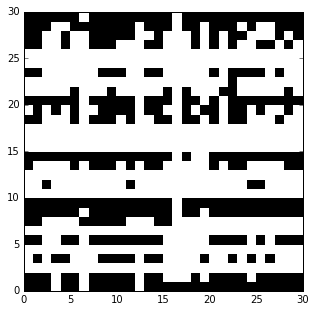

In [20]:
# calcolo le matrici di adiacenza
# serve per capire quanto è pesante una connessione 

adjm_w_nn = np.zeros([len(nations),len(nations)])
adjm_b_nn = np.zeros([len(nations),len(nations)])
for i,ie in enumerate(nations):
    for j,je in enumerate(nations):
        if ie in np.array(nndata['origin']) and je in np.array(nndata[nndata['origin']==ie]['exposure']):
            adjm_w_nn[i,j]=nndata[(nndata['origin']==ie) & (nndata['exposure']==je)]['millions']
            adjm_b_nn[i,j]=1
           
figure(figsize=(5,5))
pcolormesh(adjm_b_nn, cmap=cm.binary)

# es: una banca della nazione 3 possiede debito della nazione 25
# alcune righe sono vuote: ci sono nazioni che hanno un sacco di debito e altre che non ne hanno nessuno

[0, 30, 0, 61]

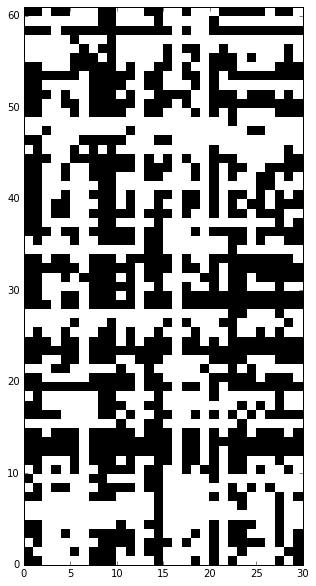

In [21]:
# matrice di adiacenza binaria

adjm_w_b = np.zeros([len(banks),len(nations)])
adjm_b_b = np.zeros([len(banks),len(nations)])
for i,ie in enumerate(banks):
    for j,je in enumerate(nations):
        if ie in np.array(bdata['bank']) and je in np.array(bdata[bdata['bank']==ie]['exposure']):
            adjm_w_b[i,j]=bdata[(bdata['bank']==ie) & (bdata['exposure']==je)]['millions']
            adjm_b_b[i,j]=1

figure(figsize=(5,10))
pcolormesh(adjm_b_b, cmap=cm.binary)
plt.axis([0, len(nations), 0, len(banks)])

# stiamo guardando le matrici di adiacenza in ordine alfabetico, che è molto arbitrario

In [ ]:
#order is arbitrary

# Graph-Viz, part 1

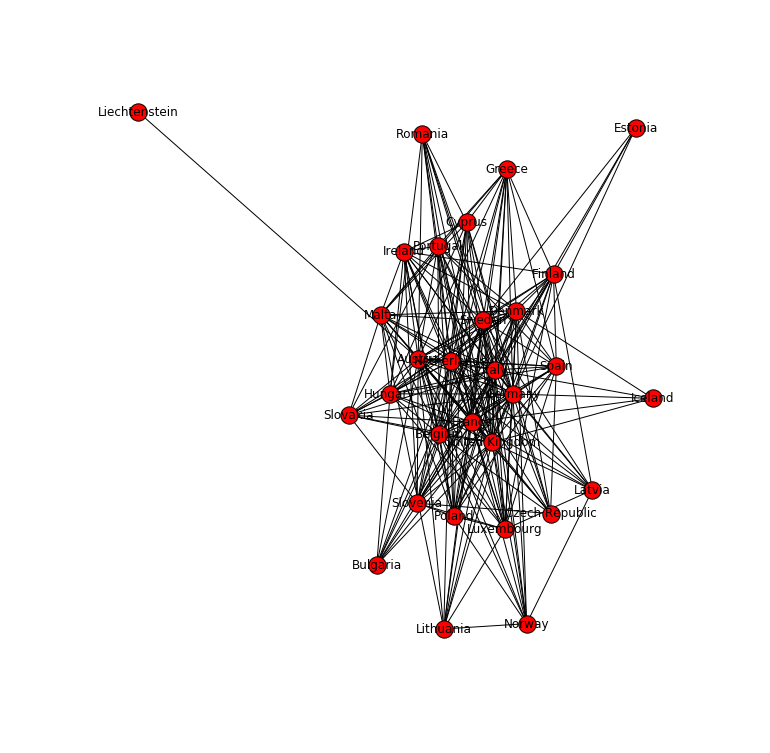

In [22]:
#building graph, edge by edge
Gnn = nx.Graph()
for i in range(adjm_b_nn.shape[0]):
    for j in range(adjm_b_nn.shape[1]):
        if adjm_b_nn[i,j]==1:
            Gnn.add_edge(nations[i],nations[j])  # ho costruito il grapho a mano
figure(figsize=(10,10))
nx.draw(Gnn,with_labels=True)

# le lunghezze degli archi non sono significative
# 

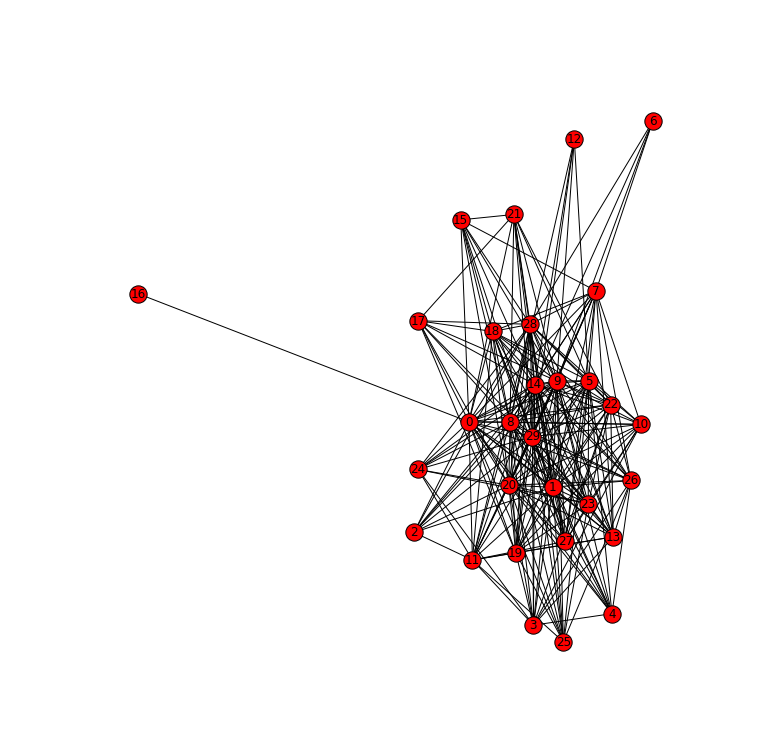

In [23]:
#the easy way
Gnn = nx.from_numpy_matrix(adjm_b_nn)   # così invece il grapho è costruito non in modo manuale
figure(figsize=(10,10))

nx.draw(Gnn,with_labels=True)

# ci sono numeri, perchè la matrice di adiacenza sono numeri, non ci sono piu le label
# i due graphi sono identici, la disposizione non è rilevante
# la posizione dei nodi non è determinante
# se ho nodi molto connessi, li mette in mezzo, altrimenti sono sparati in periferia

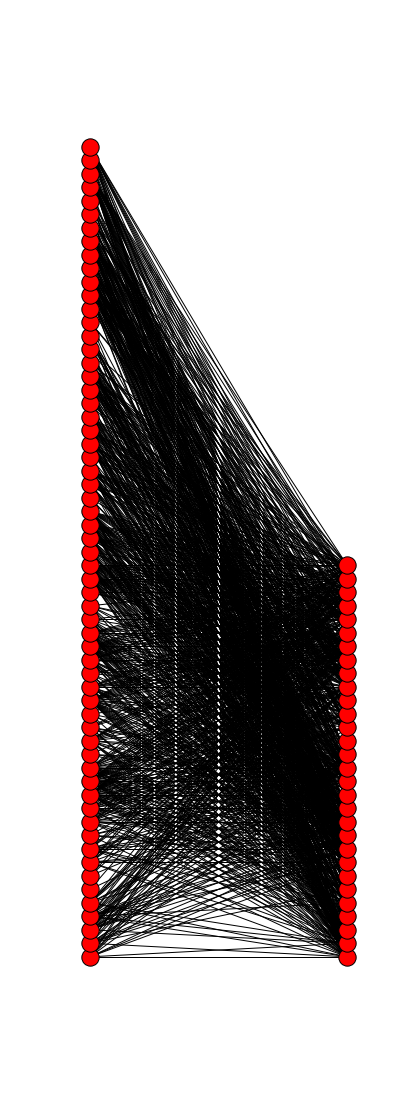

In [24]:
#and a bipartite graph

#building
from scipy.sparse import csr_matrix
from networkx.algorithms import bipartite
sparse_adj_matrix_b = csr_matrix(adjm_b_b)
Gb = bipartite.from_biadjacency_matrix(sparse_adj_matrix_b)

#drawing
figure(figsize=(5,15))
X, Y = bipartite.sets(Gb)
pos = dict()
pos.update((n, (0, i*10)) for i, n in enumerate(X))
pos.update((n, (0.5, i*10)) for i, n in enumerate(Y))
nx.draw(Gb, pos=pos)
plt.show()

# sinistra 60 banche, destra 30 nazioni

In [ ]:
#Awful, right? Visualisation is not necessarily enlightning 
#We'll see something nicer further on. For now we'll use the graphs to compute metrics

# Metrics

In [ ]:
#EX_3: Matrics! What can you obtain by groupby? What by using nx methods? How can you viz the results?

In [25]:
#out-degree (nation-clustered)
for name,group in nndata.groupby('origin'): # raggruppo per nazione di origine
    print name,len(group.groupby('exposure')), 

    # ho il grado uscente di ogni nazione: 27 connessioni uscenti dall'Austria

Austria 27 Belgium 22 Cyprus 13 Denmark 20 Finland 9 France 27 Germany 29 Hungary 4 Ireland 13 Italy 27 Luxembourg 15 Malta 16 Netherlands 25 Norway 7 Poland 1 Portugal 13 Slovenia 14 Spain 15 Sweden 22 United Kingdom 28


In [26]:
#in-degree (nation-clustered)
for name,group in nndata.groupby('exposure'):
    print name,len(group.groupby('origin')),
    

# non tutte le nazioni sono rappresentate da banche, per es non ci sono banche della Bulgaria, grado uscente 0
# però la Bulgaria ha 9 debiti verso 9 nazioni (9 connessioni entranti)

Austria 15 Belgium 16 Bulgaria 9 Cyprus 7 Czech Republic 11 Denmark 13 Estonia 4 Finland 14 France 17 Germany 18 Greece 14 Hungary 15 Iceland 5 Ireland 14 Italy 17 Latvia 10 Liechtenstein 1 Lithuania 10 Luxembourg 10 Malta 5 Netherlands 15 Norway 9 Poland 18 Portugal 13 Romania 10 Slovakia 12 Slovenia 9 Spain 12 Sweden 13 United Kingdom 11


In [27]:
#out-degree (bipartite)
for name,group in bdata.groupby('bank'):
    print name,len(group.groupby('exposure')),

ABN AMRO BANK NV 11 ALLIED IRISH BANKS PLC 12 BANCA MONTE DEI PASCHI DI SIENA S.p.A 16 BANCO BILBAO VIZCAYA ARGENTARIA S.A. (BBVA) 15 BANCO COMERCIAL PORTUGUÊS, SA (BCP OR MILLENNIUM BCP) 10 BANCO POPOLARE - S.C. 2 BANCO POPULAR ESPAÑOL, S.A. 3 BANCO SANTANDER S.A. 11 BANK OF CYPRUS PUBLIC CO LTD 12 BANK OF IRELAND 6 BANK OF VALLETTA (BOV) 16 BANQUE ET CAISSE D'EPARGNE DE L'ETAT 15 BARCLAYS plc 26 BNP PARIBAS 27 BPCE 22 Banco BPI, SA 4 Bayerische Landesbank 17 CAIXA GERAL DE DEPÓSITOS, SA 10 CAJA DE AHORROS Y PENSIONES DE BARCELONA 6 COMMERZBANK AG 26 CREDIT AGRICOLE 17 CYPRUS POPULAR BANK PUBLIC CO LTD 7 DANSKE BANK 17 DEUTSCHE BANK AG 28 DZ BANK AG Dt. Zentral-Genossenschaftsbank 23 DekaBank Deutsche Girozentrale, Frankfurt 10 DnB NOR Bank ASA 7 ESPÍRITO SANTO FINANCIAL GROUP, SA (ESFG) 3 Erste Group Bank AG 26 HSBC HOLDINGS plc 24 HSH Nordbank AG, Hamburg 13 Hypo Real Estate Holding AG, München 19 ING BANK NV 25 INTESA SANPAOLO S.p.A 22 IRISH LIFE AND PERMANENT 3 Jyske Bank 13 KBC B

In [28]:
#in-degree (bipartite)
for name,group in bdata.groupby('exposure'):
    print name,len(group.groupby('bank')),

Austria 41 Belgium 46 Bulgaria 14 Cyprus 15 Czech Republic 27 Denmark 25 Estonia 8 Finland 36 France 48 Germany 51 Greece 28 Hungary 34 Iceland 6 Ireland 35 Italy 50 Latvia 25 Liechtenstein 1 Lithuania 26 Luxembourg 24 Malta 6 Netherlands 43 Norway 17 Poland 45 Portugal 34 Romania 23 Slovakia 28 Slovenia 23 Spain 39 Sweden 32 United Kingdom 29


In [29]:
#what if I want to see them sorted?
sorted([(len(group.groupby('exposure')),name) for name,group in bdata.groupby('bank')])

[(1, u'POWSZECHNA KASA OSZCZ?DNO?CI BANK POLSKI S.A. (PKO BANK POLSKI)'),
 (2, u'BANCO POPOLARE - S.C.'),
 (2, u'Sydbank'),
 (3, u'BANCO POPULAR ESPA\xd1OL, S.A.'),
 (3, u'ESP\xcdRITO SANTO FINANCIAL GROUP, SA (ESFG)'),
 (3, u'IRISH LIFE AND PERMANENT'),
 (4, u'Banco BPI, SA'),
 (4, u'OTP BANK NYRT.'),
 (4, u'UNIONE DI BANCHE ITALIANE SCPA (UBI BANCA)'),
 (6, u'BANK OF IRELAND'),
 (6, u'CAJA DE AHORROS Y PENSIONES DE BARCELONA'),
 (6, u'Nykredit'),
 (7, u'CYPRUS POPULAR BANK PUBLIC CO LTD'),
 (7, u'DnB NOR Bank ASA'),
 (7, u'LLOYDS BANKING GROUP plc'),
 (7, u'NOVA KREDITNA BANKA MARIBOR D.D. (NKBM d.d.)'),
 (8, u'Swedbank AB (publ)'),
 (9, u'OP-Pohjola Group'),
 (10, u'BANCO COMERCIAL PORTUGU\xcaS, SA (BCP OR MILLENNIUM BCP)'),
 (10, u'CAIXA GERAL DE DEP\xd3SITOS, SA'),
 (10, u'DekaBank Deutsche Girozentrale, Frankfurt'),
 (10, u'SNS BANK NV'),
 (11, u'ABN AMRO BANK NV'),
 (11, u'BANCO SANTANDER S.A.'),
 (11, u'Svenska Handelsbanken AB (publ)'),
 (12, u'ALLIED IRISH BANKS PLC'),
 (12, 

[(u'Austria', 41), (u'Belgium', 37), (u'Bulgaria', 9), (u'Cyprus', 19), (u'Czech Republic', 11), (u'Denmark', 32), (u'Estonia', 4), (u'Finland', 22), (u'France', 43), (u'Germany', 46), (u'Greece', 14), (u'Hungary', 18), (u'Iceland', 5), (u'Ireland', 26), (u'Italy', 43), (u'Latvia', 10), (u'Liechtenstein', 1), (u'Lithuania', 10), (u'Luxembourg', 24), (u'Malta', 20), (u'Netherlands', 39), (u'Norway', 15), (u'Poland', 18), (u'Portugal', 25), (u'Romania', 10), (u'Slovakia', 12), (u'Slovenia', 22), (u'Spain', 26), (u'Sweden', 34), (u'United Kingdom', 38)]


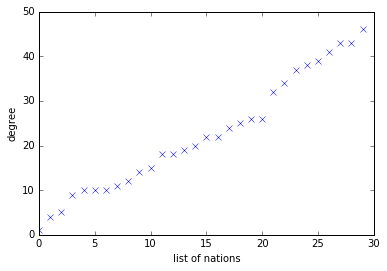

In [30]:
#degree_nn = in+out
degrees_nn = (adjm_b_nn.sum(axis=1)+adjm_b_nn.sum(axis=0)-np.diagonal(adjm_b_nn)).astype('int')
print zip(nations,degrees_nn)
plot(sorted(degrees_nn), 'bx')
xlabel('list of nations')
ylabel('degree')

# zip: prende due liste e le associa, come una cerniera

# se sommo per riga, ho il grado uscente di una nazione
# somma per colonna: grado entrante di una nazione
# sommo per riga e per colonna, devo togliere la diagonale per non contare due volte,
# la diagonale la tolgo solo una volta (per non contarla),
# non la tolgo due volte perchè una nazione potrebbe avere del debito con se stessa

# 1: Liechestain

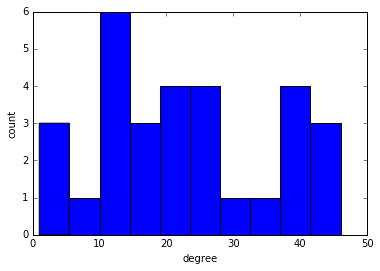

In [31]:
plt.hist(degrees_nn)
xlabel('degree')
ylabel('count')

# guardo per ogni valore quanti nodi ho con quel degree
# ho tanti nodi con degree da 10 a 15

In [32]:
np.array(sorted(degrees_nn))

array([ 1,  4,  5,  9, 10, 10, 10, 11, 12, 14, 15, 18, 18, 19, 20, 22, 22,
       24, 25, 26, 26, 32, 34, 37, 38, 39, 41, 43, 43, 46])

[1, 2, 2, 3, 3, 3, 4, 4, 4, 6, 6, 6, 7, 7, 7, 7, 8, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 22, 22, 22, 23, 23, 24, 24, 25, 26, 26, 26, 26, 27, 28]


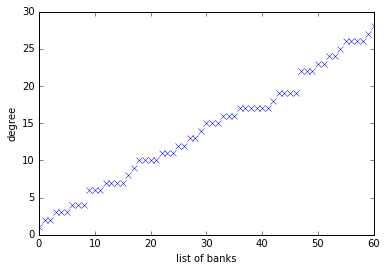

In [33]:
#banks out_degree in bipartite graph
degrees_b_banks = sorted(adjm_b_b.sum(axis=1).astype('int'))
print degrees_b_banks
plot(degrees_b_banks, 'bx')
xlabel('list of banks')
ylabel('degree')

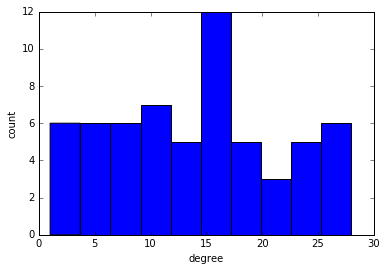

In [34]:
plt.hist(degrees_b_banks)
xlabel('degree')
ylabel('count')

[1, 6, 6, 8, 14, 15, 17, 23, 23, 24, 25, 25, 26, 27, 28, 28, 29, 32, 34, 34, 35, 36, 39, 41, 43, 45, 46, 48, 50, 51]


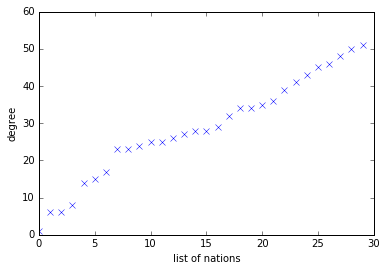

In [35]:
#nations in_degree in bipartite graph
degrees_b_nations = sorted(adjm_b_b.sum(axis=0).astype('int'))
print degrees_b_nations
plot(degrees_b_nations, 'bx')
xlabel('list of nations')
ylabel('degree')

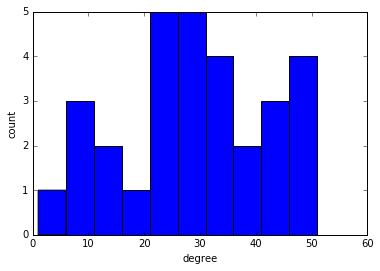

In [36]:
plt.hist(degrees_b_nations)
xlabel('degree')
ylabel('count')

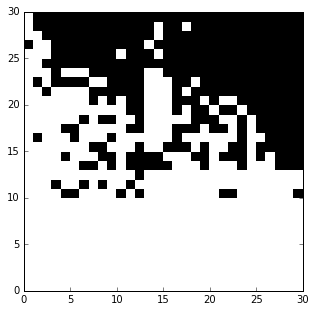

In [37]:
nu_order = argsort(degrees_nn)
sorted_adjm_b_nn = np.copy(adjm_b_nn)
sorted_adjm_b_nn = sorted_adjm_b_nn[nu_order,:]
sorted_adjm_b_nn = sorted_adjm_b_nn[:,nu_order]
figure(figsize=(5,5))
pcolormesh(sorted_adjm_b_nn, cmap=cm.binary)

{0: 0.09789155152455646, 1: 0.018515659217629665, 2: 0.0, 3: 0.004599444069887419, 4: 0.0011846117757447808, 5: 0.018556682780820715, 6: 0.0, 7: 0.011048256614759078, 8: 0.04469831618846397, 9: 0.06460800420160026, 10: 0.0022733150811968545, 11: 0.0073877613902244435, 12: 0.0, 13: 0.0033944845521200195, 14: 0.06460800420160026, 15: 0.0007215007215007215, 16: 0.0, 17: 0.0008835991594612285, 18: 0.006417563006232958, 19: 0.005942422383309083, 20: 0.028006059348423887, 21: 0.0017788724685276409, 22: 0.005477117299777399, 23: 0.00488937034503537, 24: 0.0011053806620309084, 25: 0.0009862879321007399, 26: 0.004361224435116061, 27: 0.0034451317702549234, 28: 0.032816629183624255, 29: 0.04469831618846397}


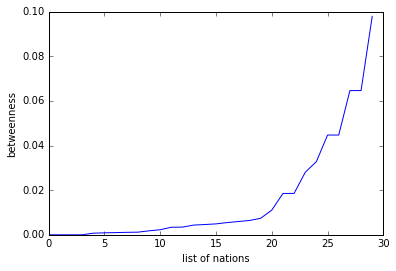

In [38]:
#now we finally use the graphs
nn_betweenness = nx.betweenness_centrality(Gnn)
print nn_betweenness
plot(sorted(nn_betweenness.values()))
xlabel('list of nations')
ylabel('betweenness')

# ci sono diverse nazioni con betweeness trascurabili e poche nazioni con betweeness alta

In [40]:
#let's have a closer look
sorted([(v,nations[k]) for k,v in nx.betweenness_centrality(Gnn).items()]) [::-1] #-1 va all'indietro
# va dal più alto al più basso
# ordina le grandezze di prima per centrality

# sorted([(v,nations[k]) for k,v in nx.betweenness_centrality(Gnn).items()])
# così parte dalle piu basse

[(0.09789155152455646, u'Austria'),
 (0.06460800420160026, u'Italy'),
 (0.06460800420160026, u'Germany'),
 (0.04469831618846397, u'United Kingdom'),
 (0.04469831618846397, u'France'),
 (0.032816629183624255, u'Sweden'),
 (0.028006059348423887, u'Netherlands'),
 (0.018556682780820715, u'Denmark'),
 (0.018515659217629665, u'Belgium'),
 (0.011048256614759078, u'Finland'),
 (0.0073877613902244435, u'Hungary'),
 (0.006417563006232958, u'Luxembourg'),
 (0.005942422383309083, u'Malta'),
 (0.005477117299777399, u'Poland'),
 (0.00488937034503537, u'Portugal'),
 (0.004599444069887419, u'Cyprus'),
 (0.004361224435116061, u'Slovenia'),
 (0.0034451317702549234, u'Spain'),
 (0.0033944845521200195, u'Ireland'),
 (0.0022733150811968545, u'Greece'),
 (0.0017788724685276409, u'Norway'),
 (0.0011846117757447808, u'Czech Republic'),
 (0.0011053806620309084, u'Romania'),
 (0.0009862879321007399, u'Slovakia'),
 (0.0008835991594612285, u'Lithuania'),
 (0.0007215007215007215, u'Latvia'),
 (0.0, u'Liechtenstei

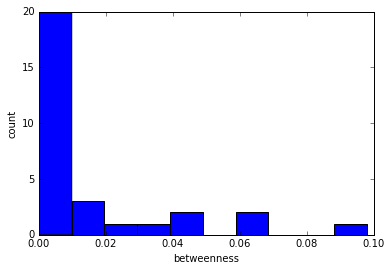

In [41]:
plt.hist(nn_betweenness.values())
xlabel('betweenness')
ylabel('count')

# ho 20 nazioni su 30 poco rilevanti; ciò è dovuto al fatto che il grapho è molto connesso 
# (se tolgo quella nazione, il grapho non è connesso)

In [ ]:
#Scatterplots!

In [42]:
nation_agg = pd.DataFrame()
nation_agg['name'] = nations
nation_agg['nn_degree'] = degrees_nn
nation_agg['nn_indegree'] = adjm_b_nn.sum(axis=0).astype('int')
nation_agg['nn_outdegree'] = adjm_b_nn.sum(axis=1).astype('int')
nation_agg['bank_indegree'] = adjm_b_b.sum(axis=0).astype('int')
nation_agg['debt'] = np.array(data.groupby('exposure')['millions'].apply(sum))
nation_agg['betweenness'] = nn_betweenness.values()
nation_agg

,name,nn_degree,nn_indegree,nn_outdegree,bank_indegree,debt,betweenness
0,Austria,41,15,27,41,42815.13,0.097892
1,Belgium,37,16,22,46,89978.57,0.018516
2,Bulgaria,9,9,0,14,1162.29,0.000000
3,Cyprus,19,7,13,15,3135.22,0.004599
4,Czech Republic,11,11,0,27,28598.32,0.001185
5,Denmark,32,13,20,25,33095.21,0.018557
6,Estonia,4,4,0,8,789.84,0.000000
7,Finland,22,14,9,36,15310.45,0.011048
8,France,43,17,27,48,192219.82,0.044698
9,Germany,46,18,29,51,469335.47,0.064608


In [43]:
banks_agg = pd.DataFrame()
banks_agg['name'] = banks
banks_agg['degree'] = adjm_b_b.sum(axis=1).astype('int')
banks_agg['owned_debt'] = np.array(data.groupby('bank')['millions'].apply(sum))
banks_agg

,name,degree,owned_debt
0,ABN AMRO BANK NV,11,18737.00
1,ALLIED IRISH BANKS PLC,12,7943.93
2,BANCA MONTE DEI PASCHI DI SIENA S.p.A,16,30671.93
3,BANCO BILBAO VIZCAYA ARGENTARIA S.A. (BBVA),15,61496.44
4,"BANCO COMERCIAL PORTUGUÊS, SA (BCP OR MILLENNI...",10,6081.78
5,BANCO POPOLARE - S.C.,2,15590.00
6,"BANCO POPULAR ESPAÑOL, S.A.",3,15600.19
7,BANCO SANTANDER S.A.,11,71769.61
8,BANK OF CYPRUS PUBLIC CO LTD,12,1933.23
9,BANK OF IRELAND,6,6458.00


In [44]:
def scatterplot(x,y,l):   # metodo scatter
    figure(figsize=(10,10))
    plt.scatter(x,y)
    for i,label in enumerate(l):
        plt.text(x[i],y[i],label)

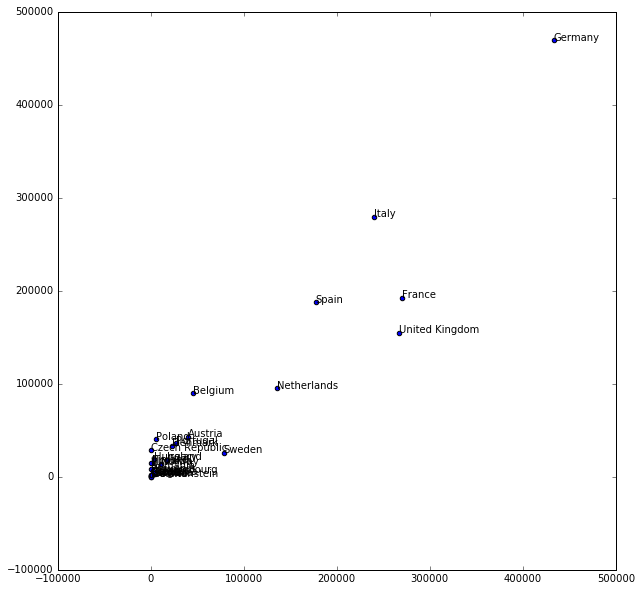

In [45]:
scatterplot(adjm_w_nn.sum(axis=1),adjm_w_nn.sum(axis=0),nations)

In [46]:
banks_agg.head()

,name,degree,owned_debt
0,ABN AMRO BANK NV,11,18737.00
1,ALLIED IRISH BANKS PLC,12,7943.93
2,BANCA MONTE DEI PASCHI DI SIENA S.p.A,16,30671.93
3,BANCO BILBAO VIZCAYA ARGENTARIA S.A. (BBVA),15,61496.44
4,"BANCO COMERCIAL PORTUGUÊS, SA (BCP OR MILLENNI...",10,6081.78


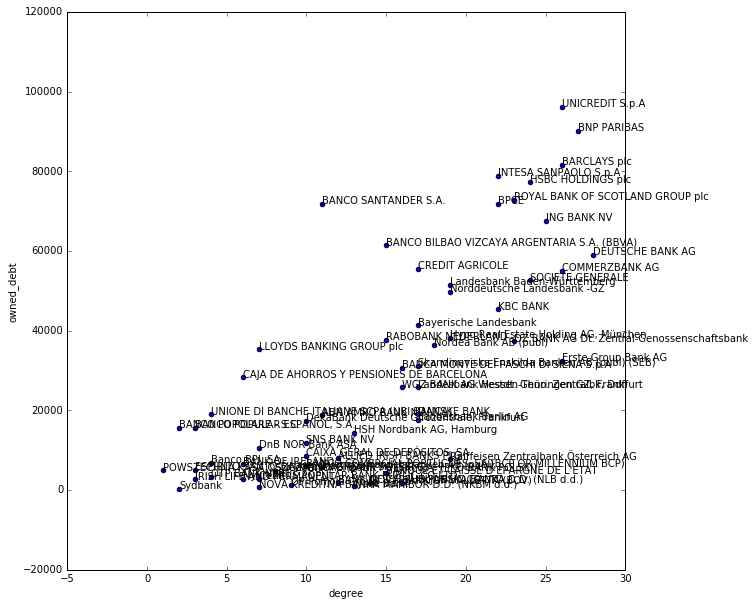

In [47]:
scatterplot(banks_agg['degree'],banks_agg['owned_debt'],banks)
xlabel('degree')
ylabel('owned_debt')

In [48]:
nation_agg.head()

,name,nn_degree,nn_indegree,nn_outdegree,bank_indegree,debt,betweenness
0,Austria,41,15,27,41,42815.13,0.097892
1,Belgium,37,16,22,46,89978.57,0.018516
2,Bulgaria,9,9,0,14,1162.29,0.000000
3,Cyprus,19,7,13,15,3135.22,0.004599
4,Czech Republic,11,11,0,27,28598.32,0.001185


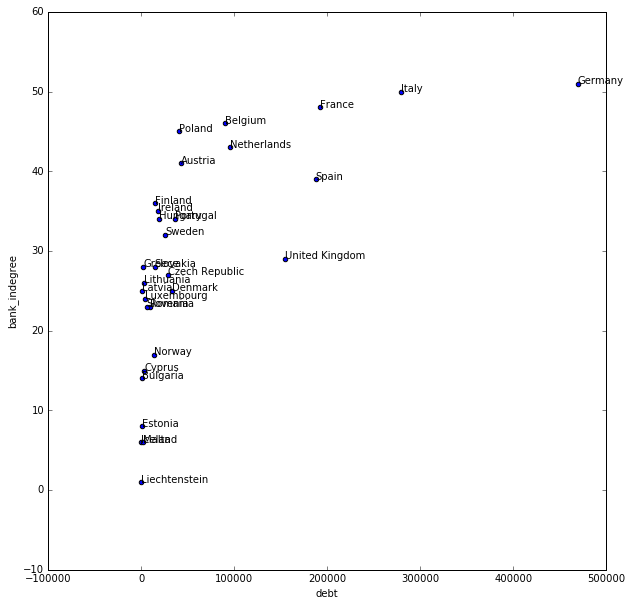

In [49]:
scatterplot(nation_agg['debt'],nation_agg['bank_indegree'],nations) 
# x: debito, y:banche che possiedono quel debito

xlabel('debt')
ylabel('bank_indegree')

# più a destra e in basso: poche connessioni e pesanti

# Community Detection

In [95]:
import community
c = community.best_partition(Gnn)

ImportError: No module named community

In [ ]:
['red','blue']

In [ ]:
import community
c = community.best_partition(Gnn)
colors = ['red','blue','green','cyan']
nx.draw(Gnn,
        pos=nx.fruchterman_reingold_layout(Gnn), 
        cmap=plt.cm.hsv,
        node_color=[colors[i] for i in [c[node] for node in Gnn.nodes()]])

In [ ]:
clustered_nations = [n for (v,n) in sorted([(v,nations[k]) for (k,v) in c.items()])]
nu_order = argsort(argsort(clustered_nations))
sorted_adjm_b_nn = np.copy(adjm_b_nn)
sorted_adjm_b_nn = sorted_adjm_b_nn[nu_order,:]
sorted_adjm_b_nn = sorted_adjm_b_nn[:,nu_order]
figure(figsize=(5,5))
pcolormesh(sorted_adjm_b_nn, cmap=cm.binary)

# Graph-Viz, part 2

In [50]:
G_nn_exp = nx.DiGraph()
for i in range(adjm_w_nn.shape[0]):
    for j in range(adjm_w_nn.shape[1]):
        if adjm_w_nn[i,j]>0:
            #print nations[i],nations[j],adjm_w_nn[i,j]
            G_nn_exp.add_edge(nations[i],nations[j],weight=adjm_w_nn[i,j])
nx.write_gml(G_nn_exp,'graph_nn.gml') # crea in output questo file

G_b_exp = nx.DiGraph()
for k in banks:
    G_b_exp.add_node(k,bipartite='bank')
for k in nations:
    G_b_exp.add_node(k,bipartite='nation')
for i in range(adjm_w_b.shape[0]):
    for j in range(adjm_w_b.shape[1]):
        if adjm_w_b[i,j]>0:
            #print banks[i],nations[j],adjm_w_b[i,j]
            G_b_exp.add_edge(banks[i],nations[j],weight=adjm_w_b[i,j])
nx.write_gml(G_b_exp,'graph_b_bip.gml')

In [ ]:
#to gephi!